# Homework 5 

1. In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to

Machine learning is often a helpful tool when we want to be able to make predictions from and find patterns in large sets of data. We especially want to use machine learning when dealing with large or complex data sets where it is difficult to understand what is going on by just looking at it. It also is important that to only use machine learning when we have data that is sorted and sufficently large. There are a few different ways that we can use machine learning. One way is unsupervised learning which focuses on clustering data and finding patterns without being able to make predicitons. For example unsupervised learning can be helpful for image recognition and targeted marketing. Another type of machine learning is supervised learning which can be used to create predictive models. Some ways we can use this is weather and other predicitive models and things such as prediciting fraud and spam. However machine learning is not always useful for all types of problems. Often if problems are simplistic or don't require prediction or pattern recognition it is unnecsary to use machine learning. It is also important to remember that machine learning while it can be very accurate, it still just provides a approximation or a prediction and is not helpful when we require an exact solution. Then it would be better to create some sort of equation that would give an exact answer based on a certain input. Machine learning is a helpful tool that can provide lots insights from large sets of data, but it is important to remember that it is not the solution to all problems especially if it cannot be applied beyond whatever data set it is being trained on.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_df= pd.read_csv("titanic.csv")
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
# 2. Perform pre-processing on the dataset
print(titanic_df.isnull().sum())
# First we will remove missing values from the age and cabin, for age we will replace all missing values with the median and for cabin since so many are NaN we will put a 1 if it has a value and a 0 if there is no value 
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Has Cabin']=titanic_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
titanic_df.head()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [95]:
# Next we will use one hot encoding to create two new columns, one where is male is true and one where is female is true, we will do this as well for embarked
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Has Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,False,True,False,False,True


In [96]:
# Now we will remove the name, passenger id, and ticket columns as they do not provide much useful data
columns_to_drop=['PassengerId','Name','Ticket']
titanic_df = titanic_df.drop(columns=columns_to_drop)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Has Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,NaN,0,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,C85,1,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,NaN,0,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,C123,1,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,NaN,0,False,True,False,False,True


Text(0.5, 1.0, 'Titanic Feature Correlation Heatmap')

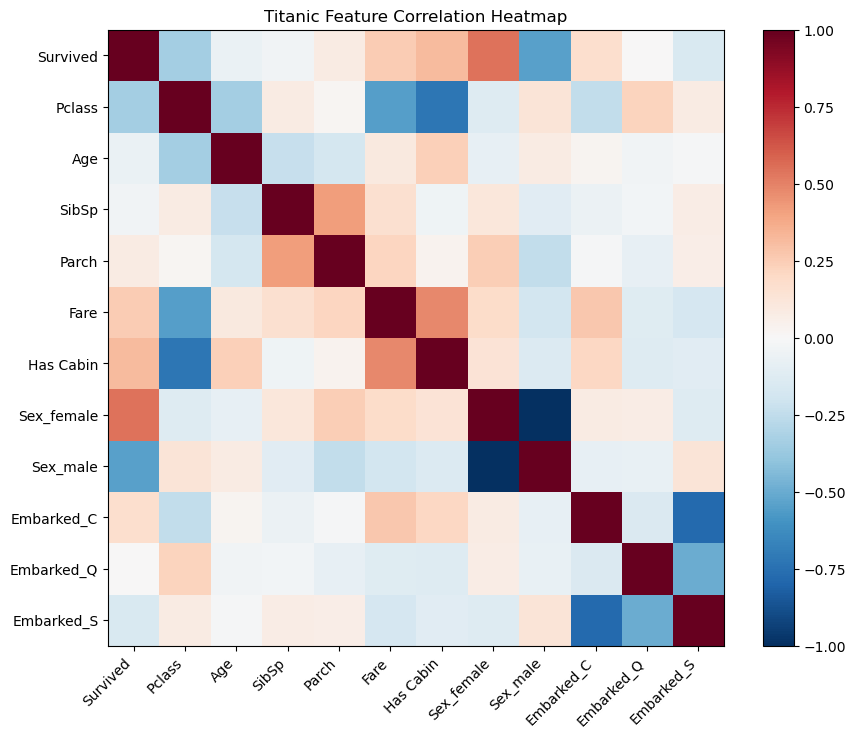

In [97]:
# 3. Create a correlation matrix with a heatmap for the features

corr_matrix=titanic_df.corr(numeric_only=True)
fig, ax= plt.subplots(figsize=(10,8))
im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin = -1, vmax =1)
plt.colorbar(im)
cols=corr_matrix.columns
ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(cols)))
ax.set_xticklabels(cols, rotation =45, ha='right')
ax.set_yticklabels(cols)
plt.title("Titanic Feature Correlation Heatmap")

When looking at the correlation matrix, there a few things of importance that seem to stand out. The first thing that stands out to me is the different correlations involving if a passenger survived or not. We can see that there was a strong postive correlation between survived and if the passenger was a women and a strong negative correlation between survived and if the passenger was male. We can also see that there is a postive correlation of survived with has cabin and fare and a negative correlation of survived and class. Also of note is the postive correlation that fare has with embarked at C, if they had a spouse, parent or child with them, and has cabin. From our findings, the the most important features that we would want to select would be Survived, Age, Fare, Sex_female, Sex_male and potenially the 3 embarked locations as well

Text(0.5, 0, 'Fare')

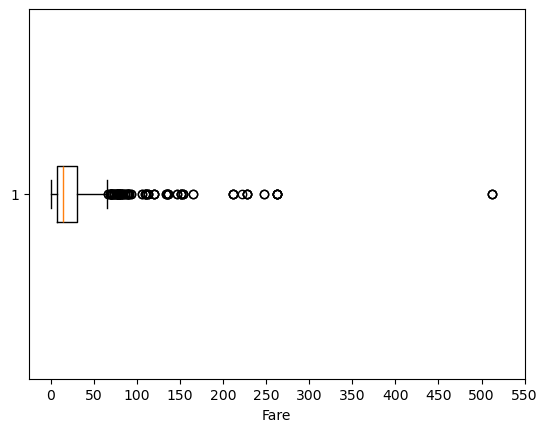

In [98]:
#Create a box and whisker plot for fare
plt.boxplot(titanic_df['Fare'], vert=False)
plt.xticks(np.arange(0,600,50))
plt.xlabel('Fare')

When looking at the boxplot for fare, we can see our data is heavily skewed to the right due to many large outliers. Most of our data is cluster in the 0 to 50 range with our median around $20. 

In [99]:
# 5. create a new column called age_bin that groups people into at least 4 age ranges. 
import time
start_time = time.perf_counter()
titanic_df['age_bin_1']=titanic_df['Age'].apply(
    lambda x: 'Child' if x < 15 else
        'Young Adult' if x < 30 else
        'Adult' if x < 60 else
        'Senior'
)
end_time = time.perf_counter()
print( f"Lamba method took: {end_time-start_time} seconds")

start_time = time.perf_counter()
titanic_df['age_bin_2']=titanic_df['Age'] = pd.cut(
    titanic_df['Age'],
    bins=[0,15,30,60,100],
    labels=['Child','Young Adult','Adult','Senior']
)
end_time = time.perf_counter()
print( f"the other method took: {end_time-start_time} seconds")

Lamba method took: 0.00033608300145715475 seconds
the other method took: 0.0005510830087587237 seconds


Here we can see that the lambda method is slightly fastert than the other method with the bins.

array([[<Axes: title={'center': 'Adult'}>,
        <Axes: title={'center': 'Child'}>],
       [<Axes: title={'center': 'Senior'}>,
        <Axes: title={'center': 'Young Adult'}>]], dtype=object)

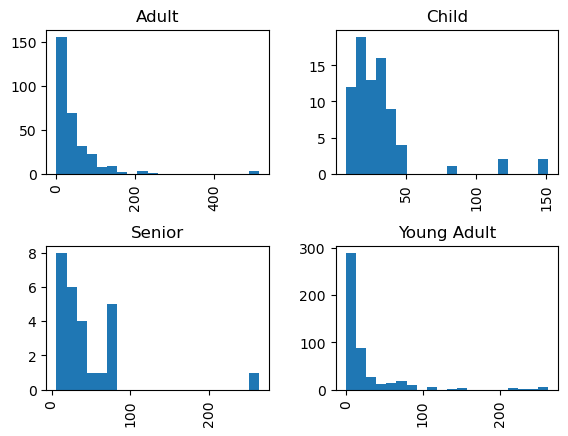

In [100]:
# 6. create subplot histograms to show how fares differ by age_bin. 
titanic_df.hist(
    column ='Fare',
    by= 'age_bin_1',
    bins=20
    
)


When looking at our histograms, we can see that all of the graphs have a strong skew to the right, however some are more skewed than others. Both adult and young adult have a similar distribution with a few high outliers, but for the most part the fare is concetrated pretty low. However we see a little less of a skew to the right for seniors and children. Then child data is mostly evenly distributed from 0 to 50 with a few high outliers. With the Senior data we see two clear peaks in the data around 20 and 80 with one clear high outlier 